## Réputation des participants en cas de comportements oscillatoires 

Objectif tester les trois fonctions de decay à  l'étude : 
1. Exponentielle avec des valeurs de $\lambda$ comprise entre 0.3,0.5 et 0.9.  
2. Double windows avec fentre longue a 20,15,10 et une fenetre courte à 5. 
3. Adaptive windows.   

In [1]:
from plot_label import plot_reput_overtime,boxplot_label_overtime

## Table de comparaison 

In [2]:

import tabulate
from pathlib import Path
from plot_utils import load_total_positive,load_total_negative,load_total_interactions

p_exp =  Path("../results/multirun/2024-02-16/11-23-00/0/")
p_d_win = Path("../results/multirun/2024-02-16/11-23-00/1/")
p_s_win = Path("../results/multirun/2024-02-16/11-23-00/2/")
p_a_win = Path("../results/multirun/2024-02-16/11-23-00/3/")

data = [ ["","Successes","Failures","Total"],
         ["Exponential decay",load_total_positive(p_exp),load_total_negative(p_exp),load_total_interactions(p_exp)],
         ["Single window",load_total_positive(p_s_win),load_total_negative(p_s_win),load_total_interactions(p_s_win)],
         ["Double window",load_total_positive(p_d_win),load_total_negative(p_d_win),load_total_interactions(p_d_win)],
         ["Adaptive window",load_total_positive(p_a_win),load_total_negative(p_a_win),load_total_interactions(p_a_win)],
         ]
table = tabulate.tabulate(data, tablefmt='html')
table

,Successes,Failures,Total
Exponential decay,6999,1001,8000
Single window,6613,1387,8000
Double window,6824,1176,8000
Adaptive window,6800,1200,8000


## Nombre d'interactions négatives totales 

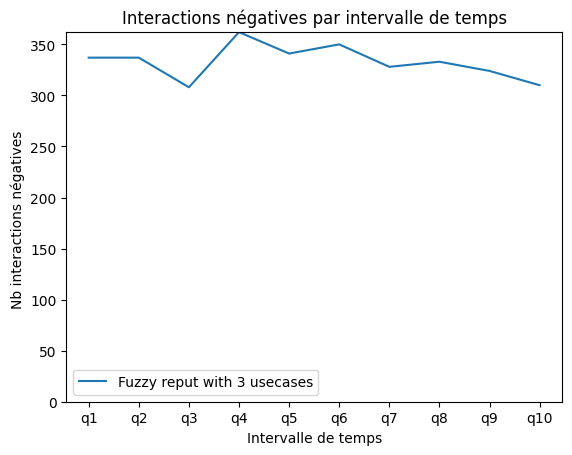

In [1]:
from plot_label import plot_negative_interactions_overtime
from pathlib import Path

p_fuzzy_reput = Path("../results/run/2024-04-12/13-15-10")


l = [("Fuzzy reput with 3 usecases",p_fuzzy_reput)]  
plot_negative_interactions_overtime(l,fuzzy=True)



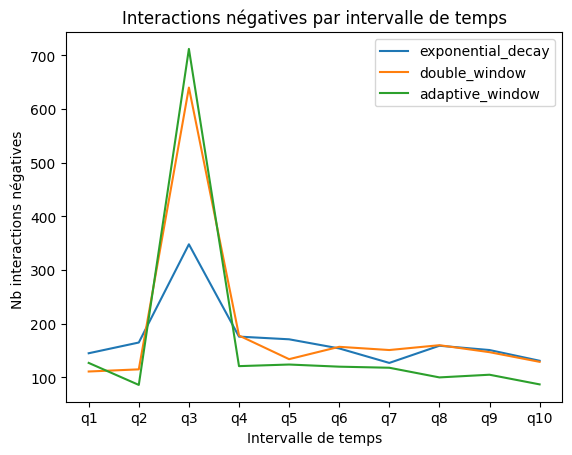

In [2]:
from plot_label import plot_negative_interactions_overtime
from pathlib import Path

p_exp =  Path("../results/multirun/2024-02-16/11-28-04/0/")
p_d_win = Path("../results/multirun/2024-02-16/11-28-04/1/")
p_s_win = Path("../results/multirun/2024-02-16/11-28-04/2/")
p_a_win = Path("../results/multirun/2024-02-16/11-28-04/3/")

l = [("exponential_decay",p_exp), ("double_window",p_d_win) ,("adaptive_window",p_a_win)]  
plot_negative_interactions_overtime(l)

## Analyse de la réputation des participants

### Non fuzzy logic

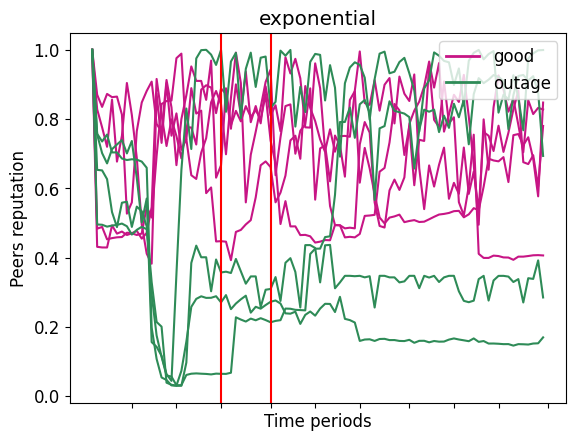

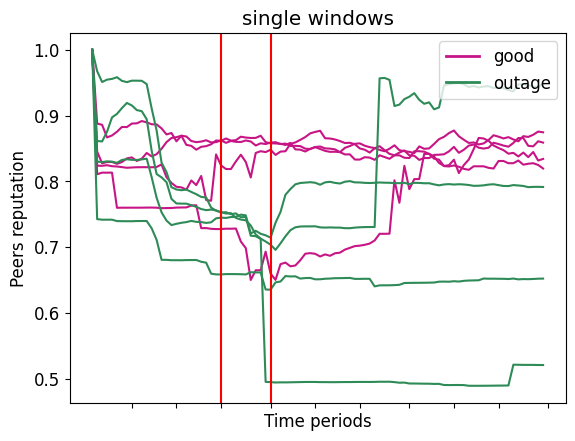

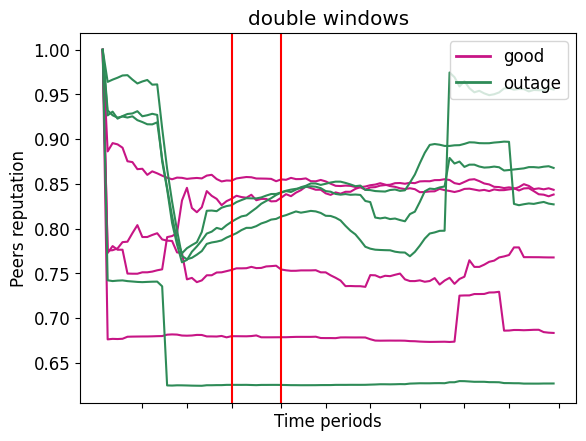

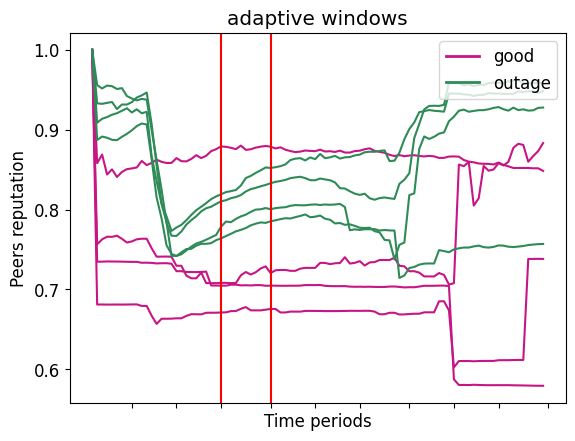

In [7]:
from pathlib import Path
from plot_label import plot_reput_overtime


p_exp =  Path("../results/multirun/2024-02-16/11-28-04/0/")
p_d_win = Path("../results/multirun/2024-02-16/11-28-04/1/")
p_s_win = Path("../results/multirun/2024-02-16/11-28-04/2/")
p_a_win = Path("../results/multirun/2024-02-16/11-28-04/3/")


plot_reput_overtime(p_exp, title="exponential")
plot_reput_overtime(p_s_win, title="single windows")
plot_reput_overtime(p_d_win, title="double windows")
plot_reput_overtime(p_a_win, title="adaptive windows")

# Régler l'affichage de l'axe x : mettre des ticks à intervalles régulier
# Régler l'affichage de la panne : 
    # 1. passer en paramètre les endroits en panne
    # 2. Les extraires d'hydra ? 
# Capacité, ou est-ce qu'on en est ? Un seul qui peut tout prendre ? 

## Exponential decay

Pourquoi est-ce que outage remonte après le pas de temps n°7 ?

Hypothèse 1 : Il y a de la sélection aléatoire. 
Hypothèse 2 : La moyenne de reputation masque le fait que certains participants donnent une bonne réputation à ce noeud. 

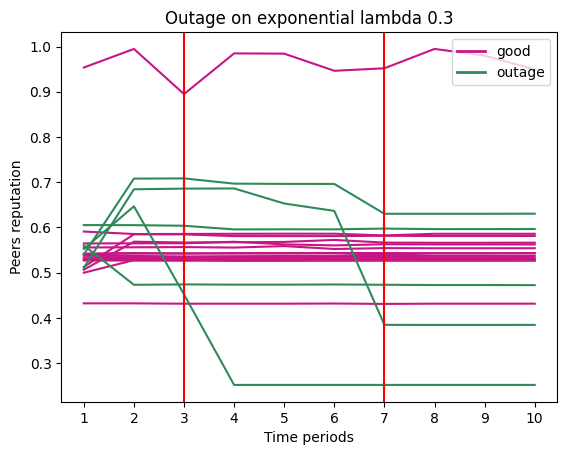

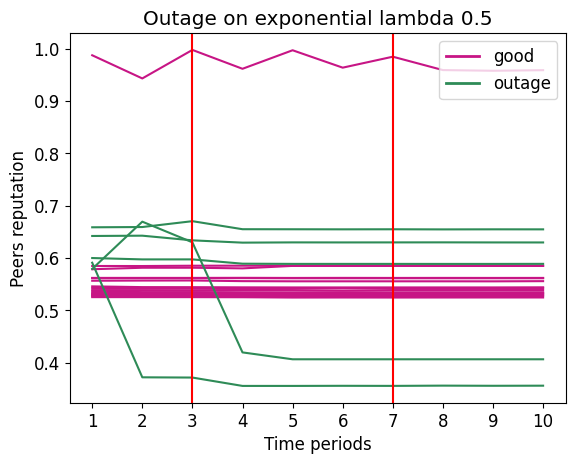

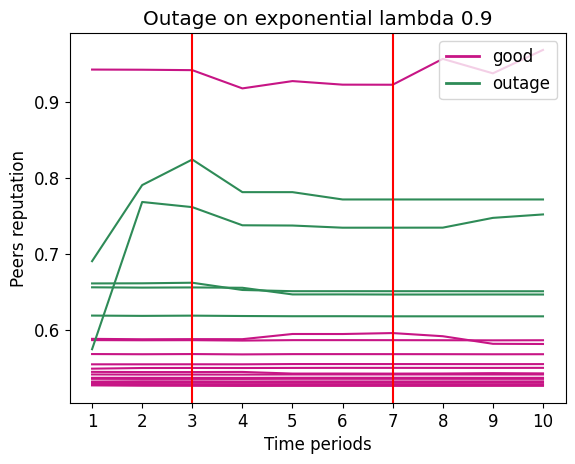

In [2]:
plot_reput_overtime("../results/decay_results/exponential_decay/0.3", title="Outage on exponential lambda 0.3")

plot_reput_overtime("../results/decay_results/exponential_decay/0.5", title="Outage on exponential lambda 0.5")

plot_reput_overtime("../results/decay_results/exponential_decay/0.9", title="Outage on exponential lambda 0.9")



## Effet du type de participants 

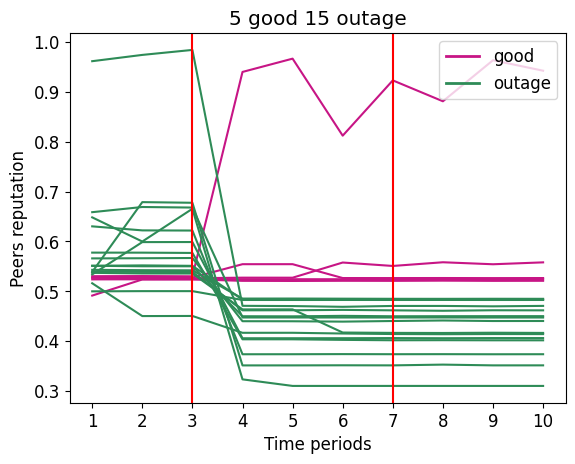

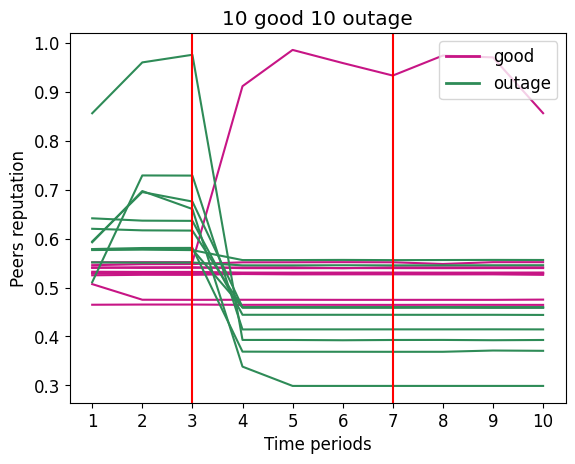

In [6]:
plot_reput_overtime("../results/run/2024-01-26/10-52-54", title="5 good 15 outage")
plot_reput_overtime("../results/run/2024-01-26/10-52-34", title="10 good 10 outage")


## Effet du nombre de transactions
Içi la part de sélection aléatoire est fixée à 0.1 (ce qui est entre beaucoup et énorme)


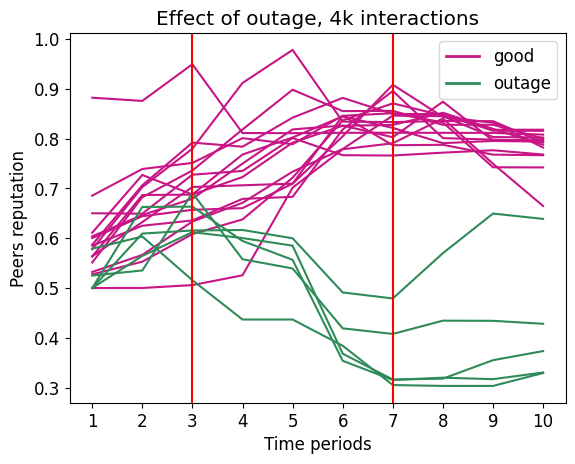

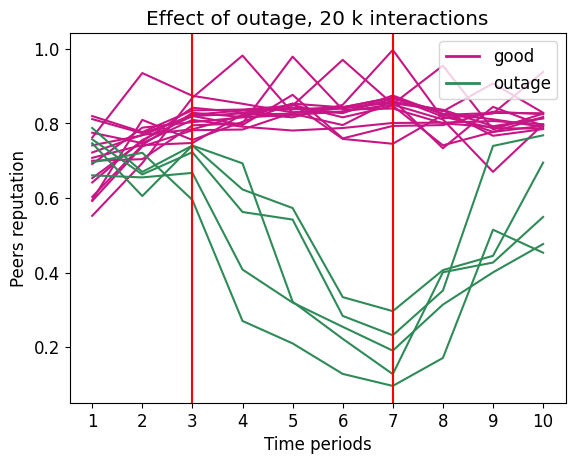

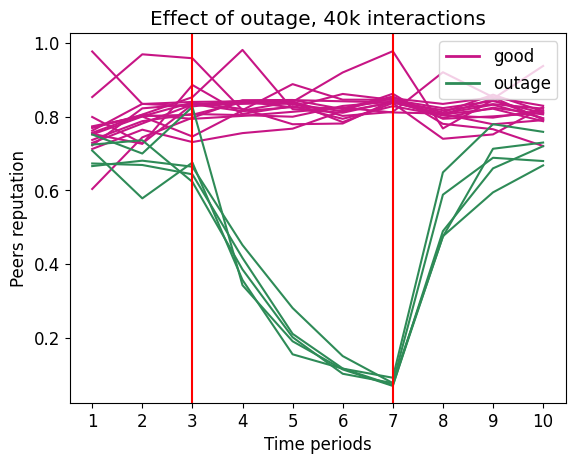

In [3]:
plot_reput_overtime("../results/run/2024-01-19/11-26-57", title="Effect of outage, 4k interactions")

plot_reput_overtime("../results/run/2024-01-26/09-40-24", title="Effect of outage, 20 k interactions")

plot_reput_overtime("../results/run/2024-01-26/10-47-35", title="Effect of outage, 40k interactions")

## Bootstrap effect ? 

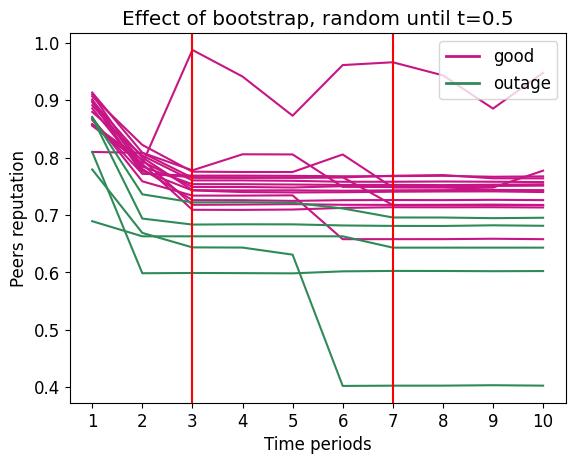

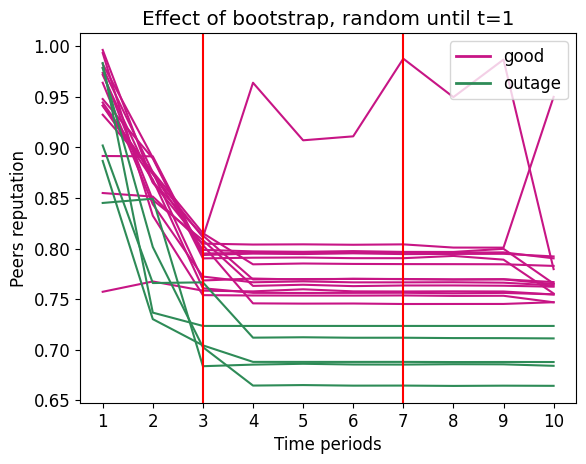

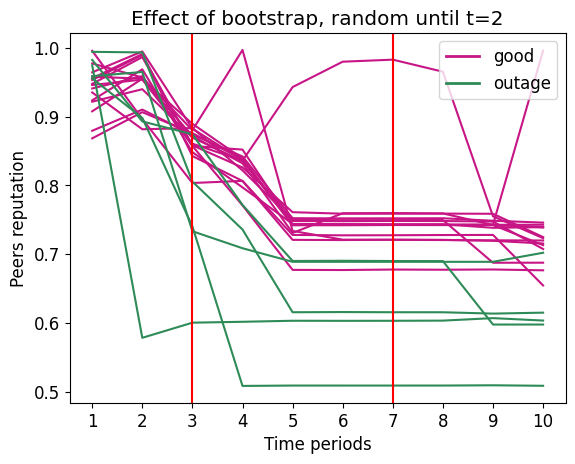

In [12]:
# plot_reput_overtime("../results/run/2024-01-26/11-55-04", title="Effect of bootstrap, 4k interactions")

plot_reput_overtime("../results/run/2024-01-26/12-16-12", title="Effect of bootstrap, random until t=0.5")


plot_reput_overtime("../results/run/2024-01-26/12-16-25", title="Effect of bootstrap, random until t=1")

plot_reput_overtime("../results/run/2024-01-26/11-55-04", title="Effect of bootstrap, random until t=2")



# Fuzzy 

### Base case

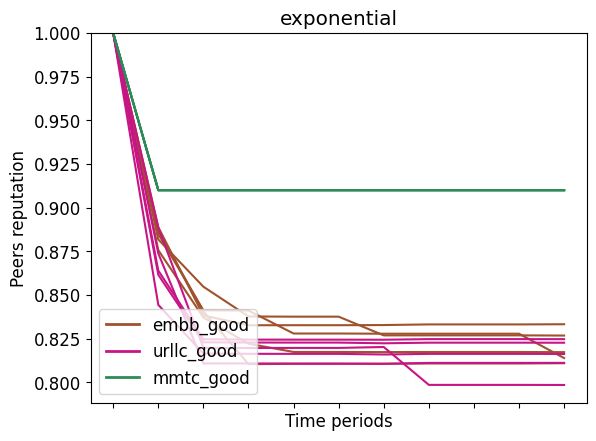

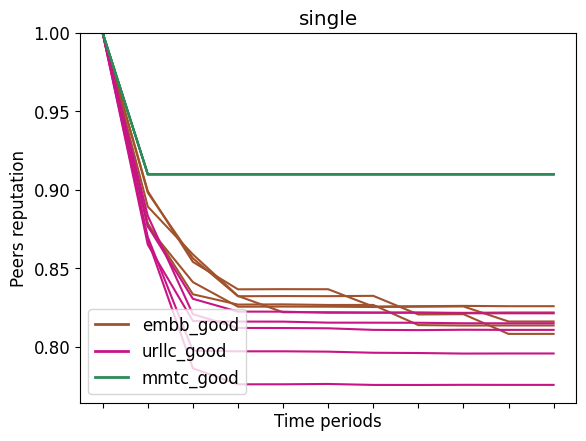

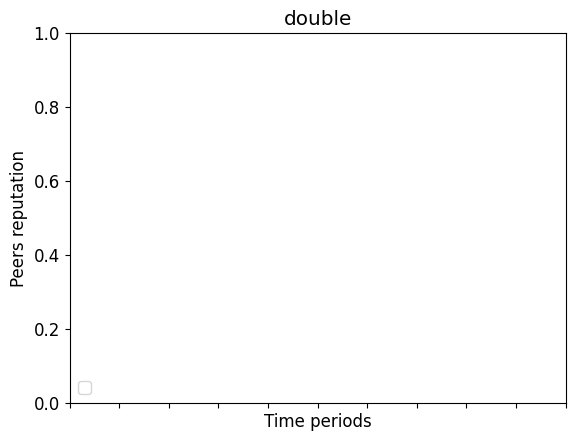

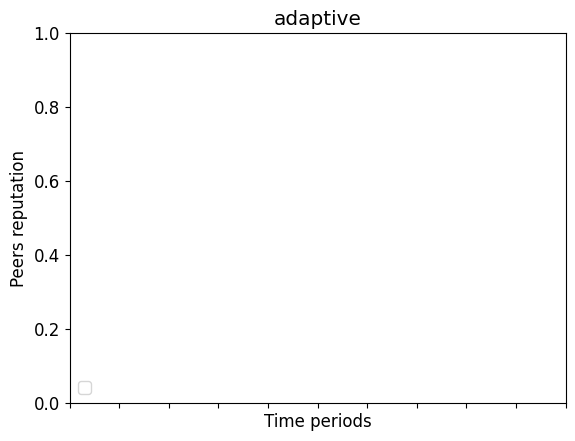

In [2]:
from pathlib import Path
from plot_label import plot_reput_overtime

date_time = "2024-06-11/11-39-05"

exponential = Path(f"../results/multirun/{date_time}/0")
single = Path(f"../results/multirun/{date_time}/1")
double = Path(f"../results/multirun/{date_time}/2")
adaptive = Path(f"../results/multirun/{date_time}/3")

plot_reput_overtime(exponential, title="exponential", labels_filter=[""])
plot_reput_overtime(single, title="single", labels_filter=[""])
plot_reput_overtime(double, title="double", labels_filter=["outage"])
plot_reput_overtime(adaptive, title="adaptive", labels_filter=["outage"])


### Outage

#### Analysing peer reputation

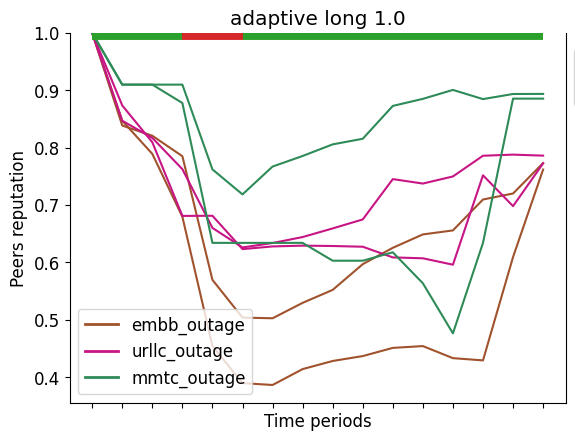

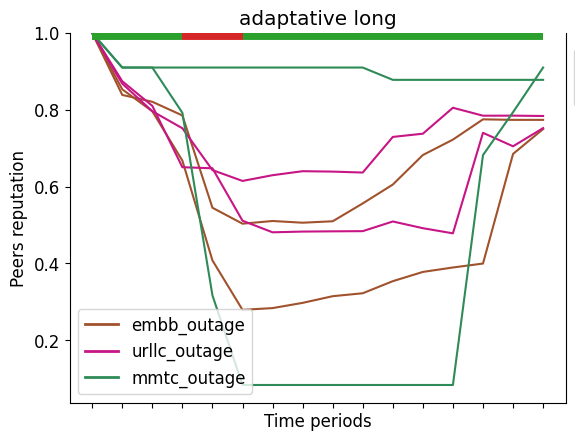

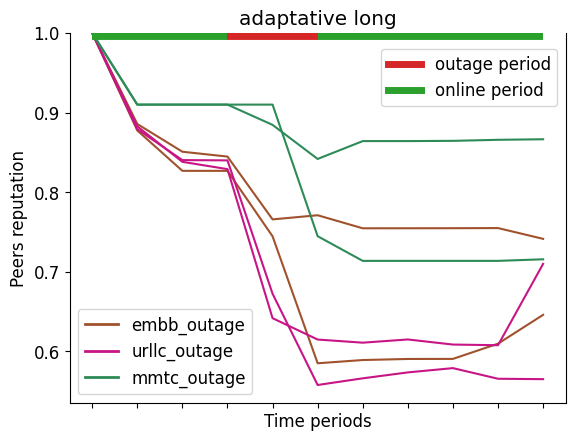

In [10]:
from pathlib import Path
from plot_label import plot_reput_overtime

date_time = "2024-06-12/18-02-43"

exponential = Path(f"../results/multirun/{date_time}/0")
single = Path(f"../results/multirun/{date_time}/1")
double = Path(f"../results/multirun/{date_time}/2")
adaptive = Path(f"../results/run/2024-06-28/15-07-34")

outage = [(3, 5)]

# plot_reput_overtime(exponential, title="exponential", labels_filter=[""], outage=outage)
# plot_reput_overtime(single, title="single", labels_filter=[""], outage=outage)
# plot_reput_overtime(double, title="double", labels_filter=["outage"], outage=outage)
plot_reput_overtime(adaptive, title="adaptive long 1.0", labels_filter=["outage"], outage=outage)

date_long = "2024-06-19/13-11-02"
adaptive_long = Path(f"../results/run/{date_long}")
plot_reput_overtime(adaptive_long, title="adaptative long", labels_filter=["outage"], outage=outage)

date_long = "2024-06-24/16-28-18"
adaptive_long = Path(f"../results/run/{date_long}")
plot_reput_overtime(adaptive_long, title="adaptative long", labels_filter=["outage"], outage=outage)


# Ticks handling : 

#### Comparing with interactions overtime

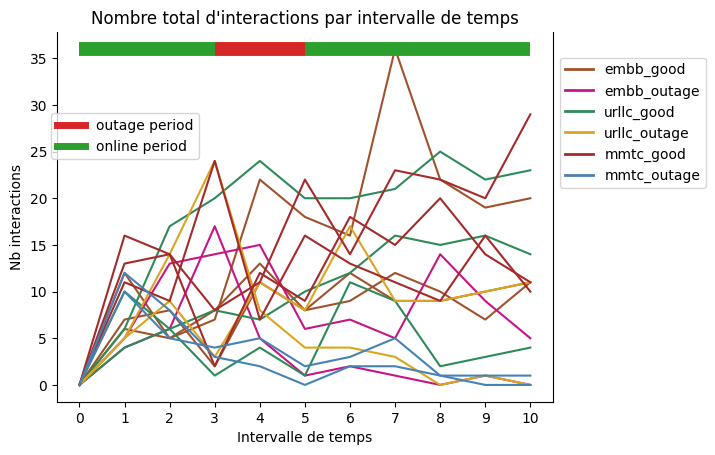

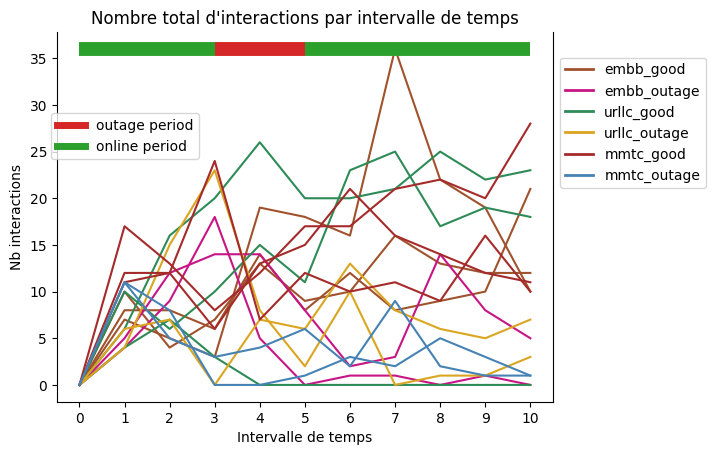

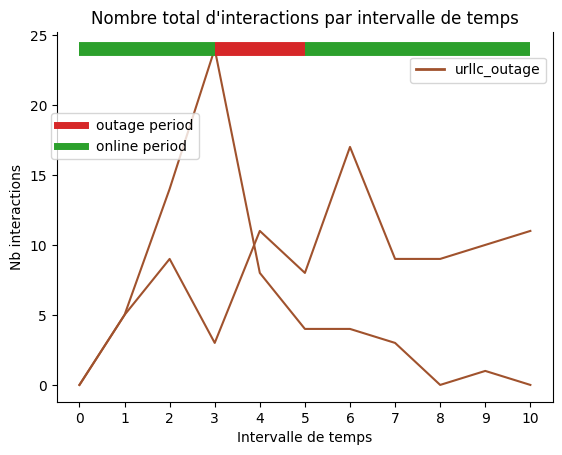

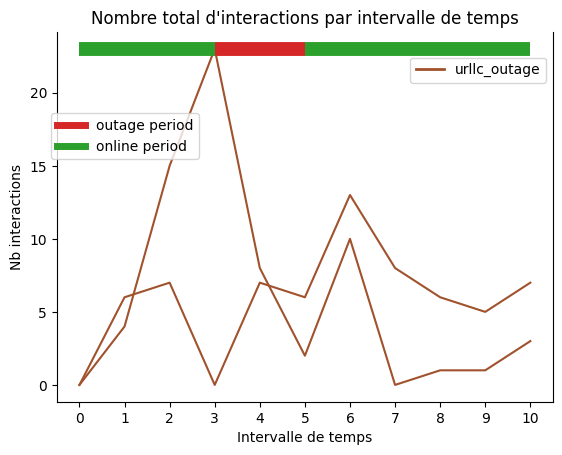

In [6]:
from plot_label import plot_participant_interactions_overtime
from pathlib import Path

# Homogénéiser les légendes et les couleurs 

date_time = "2024-06-12/18-02-43"

exponential = Path(f"../results/multirun/{date_time}/0")
single = Path(f"../results/multirun/{date_time}/1")
double = Path(f"../results/multirun/{date_time}/2")
adaptive = Path(f"../results/multirun/{date_time}/3")

outage = [(3, 5)]
plot_participant_interactions_overtime(double, labels_filter=[""], outage=outage)
plot_participant_interactions_overtime(adaptive, labels_filter=[""], outage=outage)


plot_participant_interactions_overtime(double, labels_filter=["urllc_outage"], outage=outage)
plot_participant_interactions_overtime(adaptive, labels_filter=["urllc_outage"], outage=outage)

#### Comparing with failures overtime

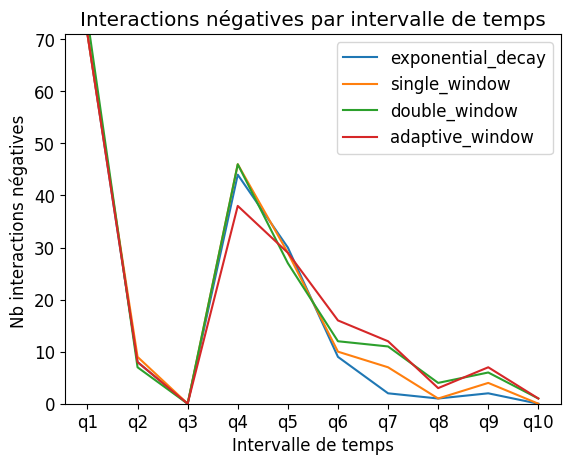

In [11]:
from plot_label import plot_negative_interactions_overtime
from pathlib import Path
date_time = "2024-06-12/18-02-43"

exponential = Path(f"../results/multirun/{date_time}/0")
single = Path(f"../results/multirun/{date_time}/1")
double = Path(f"../results/multirun/{date_time}/2")
adaptive = Path(f"../results/multirun/{date_time}/3")

exponential_outage = [(3, 5)]

l = [("exponential_decay",exponential), ("single_window",single), ("double_window",double) ,("adaptive_window",adaptive)]  
plot_negative_interactions_overtime(l,fuzzy=True)

### Oscillatory

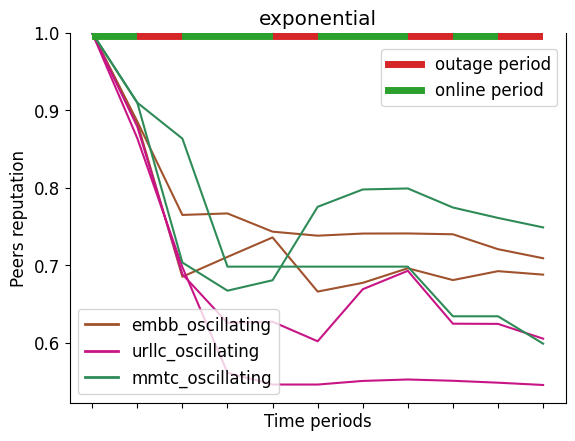

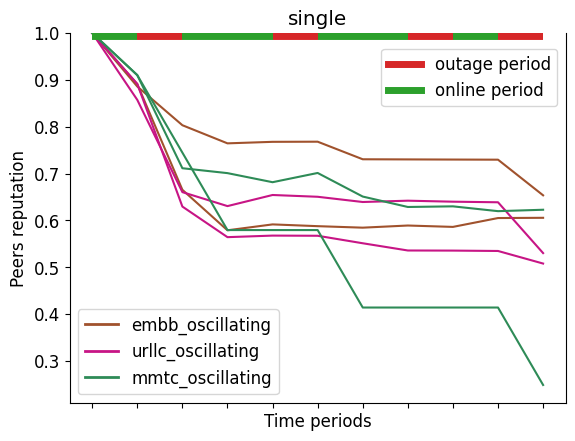

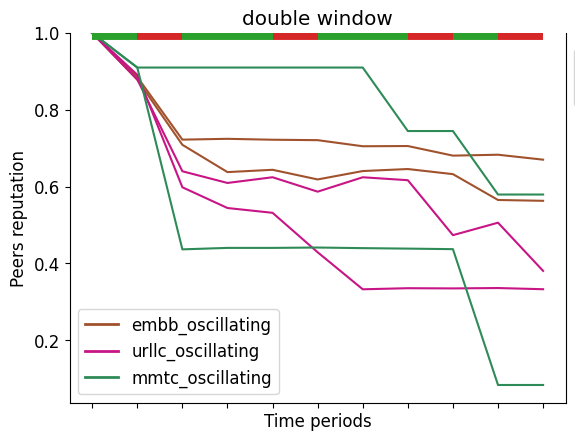

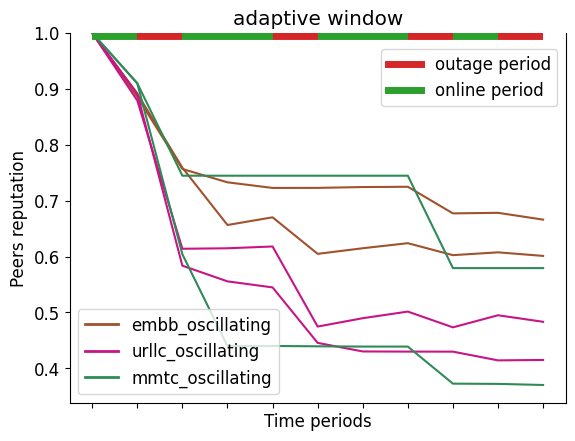

In [7]:
from pathlib import Path
from plot_label import plot_reput_overtime

#oscillatory run.
date_time = "2024-06-12/18-04-41"

exponential = Path(f"../results/multirun/{date_time}/0")
single = Path(f"../results/multirun/{date_time}/1")
double = Path(f"../results/multirun/{date_time}/2")
adaptive = Path(f"../results/multirun/{date_time}/3")

oscillatory_outage = [(1, 2), (4, 5), (7, 8), (9, 10)]

plot_reput_overtime(exponential, title="exponential", labels_filter=["oscillating"],outage=oscillatory_outage)
plot_reput_overtime(single, title="single", labels_filter=["oscillating"],outage=oscillatory_outage)
plot_reput_overtime(double, title="double window", labels_filter=["oscillating"],outage=oscillatory_outage)
plot_reput_overtime(adaptive, title="adaptive window", labels_filter=["oscillating"],outage=oscillatory_outage)
